# Numpy 笔记(一)

## 1.1 导入

使用numpy需要导入numpy模块, 如下：

In [5]:
import numpy as np

## 1.2 创建numpy数组

有很多种创建numpy数组的方法，例如：
- 使用tuple
- 使用list
- 使用numpy提供的函数
- 从文件中读取数据

### 1.2.1 使用tuple创建numpy数组
我们可以使用numpy的**array**函数和python中的**tuple**来创建numpy数组.

In [2]:
# 构造一个一维的numpy数组, 传入的参数t是一个tuple
t = (2,3)
vec = np.array(t)
vec

array([2, 3])

In [3]:
# 构造一个二维的numpy数组, 传入的参数t是一个嵌套的tuple
t = ((1,2,3),(4,5,6))
mtrx = np.array(t)
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

我们可以使用python中的**type**函数来查看一个变量的类型:

In [4]:
print(type(vec))
print(type(mtrx))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


我们可以看到, 通过上面创建的两个变量都是numpy.ndarray类型. 不同的是它们的维度, 一个是一维的, 一个是二维的. 我们可以使用numpy数组的**ndim**属性来查看维度.

In [7]:
print(vec.ndim)
print(mtrx.ndim)

1
2


In [8]:
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

这是刚才我们创建的一个二维的numpy数组, 可以把它看成一个$2\times3$的矩阵. 假设在我们创建的时候, 不小心写成了:

In [14]:
# 第二个少写了一个6
t = ((1,2,3), (4,5))
vec = np.array(t)
vec

array([(1, 2, 3), (4, 5)], dtype=object)

我们本意是想创建一个$2\times3$的矩阵, 但由于粗心输错了. 这时候numpy并不会报错, 它会将(1,2,3)看成一个元素, (4,5)看成一个元素, 创建一个包含两个元素的向量. 这两个元素都是tuple类型, 第一个元素是(1,2,3), 第二个元素是(4,5). 上面输出结果中的dtype就代表了组成该numpy数组的元素的类型. 在这个例子中, 组成该向量的元素为一个python中的tuple, 在numpy中它是object类型. 我们也可以使用python中的type方法看一下元素在python中是什么类型.

In [6]:
print(type(vec[0]))
print(type(vec[1]))

<class 'tuple'>
<class 'tuple'>


从上面的例子我们也发现了, numpy数组中的所有元素必须是同一数据类型dtype. 

In [7]:
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

我们来看看这个mtrx中元素的类型:

In [17]:
# 64位整型
mtrx.dtype

dtype('int64')

若在构造矩阵时, 输入的类型不一致, 则numpy可对其进行数据类型转换, 例如:

In [21]:
# 同时包含了字符和数字
t = ((1,2,"a"),(4,5,6))
mtrx = np.array(t)
print(mtrx)

[['1' '2' 'a']
 ['4' '5' '6']]


我们可以在构造矩阵时传入dtype参数, 用来指定该矩阵元素的类型:

In [26]:
mtrx = np.array([[1,2,3], [4,5,6]], dtype=float)
mtrx

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

一些常见的数据类型都可以用在dtype: int, float, complex, bool, object等等。
我们也可以指定数据类型的位数大小：int16, int32, int16, float128, complex128. 例如:

In [27]:
mtrx = np.array([[1,2,3], [4,5,6]], dtype="int16")
mtrx

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

如果我们将numpy数组某一元素赋值一个不一致类型的值, 则会报ValueError错误. 例如, 我们将上面矩阵的第一行第一列的元素赋值为"a":

In [28]:
mtrx[0,0] = "a"

ValueError: invalid literal for int() with base 10: 'a'

### 1.2.2 使用list创建numpy数组
除了tuple, 我们还可以使用python中的**list**来构造向量或矩阵。

In [29]:
# 构造一个一维的numpy数组, 传入的参数li是一个list
li = [1,2,3,4]
vec = np.array(li)
vec

array([1, 2, 3, 4])

In [30]:
# 构造一个二维的numpy数组, 传入的参数li是一个嵌套的list
li = [[1, 2, 3], [2, 3, 4]]
mtrx = np.array(li)
mtrx

array([[1, 2, 3],
       [2, 3, 4]])

上一小节我们介绍了numpy数组的一些属性和相关函数, 这一小节再介绍几个.  
对于一个numpy数组来说, 我们可以使用它的**shape**属性来查看行列数:

In [31]:
mtrx.shape

(2, 3)

或者使用numpy的**shape**函数来查看:

In [33]:
print(np.shape(mtrx))

(2, 3)


从结果可以看出, 这是一个2行3列的numpy数组. 而对于一个一维的numpy数组:

In [34]:
vec

array([1, 2, 3, 4])

In [35]:
print(vec.shape)

(4,)


numpy数组还有一个**size**属性, 表示该数组的元素个数. 

In [36]:
print(mtrx.size)

6


可以使用**itemsize**查看每个元素所占空间(bytes):

In [39]:
mtrx.itemsize

8

### 1.2.3 使用numpy提供的函数生成矩阵
由于前面的方法需要我们手动输入numpy数组的元素所以只适用于构造比较小的矩阵. 如果想要构造比较大的矩阵, 使用前面的方法就太低效了. 还好numpy提供了一些函数, 利用这些函数我们可以快速的构造不同形式的矩阵.

#### identity
可以用它来快速生成单位阵.

In [47]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

可以使用dtype指定元素类型:

In [50]:
np.identity(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### zeros & ones

In [61]:
np.ones((3,3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [62]:
np.zeros((5,), dtype=int)

array([0, 0, 0, 0, 0])

#### full

In [57]:
np.full((3,3), 9, dtype=int)

array([[9, 9, 9],
       [9, 9, 9],
       [9, 9, 9]])

#### arange

第一个参数为起始位置(默认为0), 第二个参数为结束位置(不包含), 第三个参数为跨度(默认为1).

In [65]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

跨度也可以使用小数

In [20]:
np.arange(1, 5, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

#### linspace

第一个参数为起始位置, 第二个参数为结束位置(包含), 第三个参数为总元素个数.

In [84]:
np.linspace(0, 10, num=10)

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

参数endpoint默认为False, 当其为true时, 结果如下:

In [88]:
np.linspace(0, 10, num=10, endpoint=False)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

这个函数稍微复杂一点, 可以看一下官方文档:[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace)

#### logspace

刚才的linspace得到的各个元素之间是均匀增长的, 而logspace是指数增长的, 他需要第四个参数base(底数). 举个例子就好理解了:

In [95]:
np.linspace(1, 5, num=5)

array([ 1.,  2.,  3.,  4.,  5.])

In [96]:
np.logspace(1, 5, num=5, base=2)

array([  2.,   4.,   8.,  16.,  32.])

#### rand

In [4]:
from numpy import random

每个元素为[0,1]随机数

In [99]:
random.rand(3,3)

array([[ 0.10769437,  0.36436981,  0.78879667],
       [ 0.29636172,  0.40860423,  0.98191222],
       [ 0.01030314,  0.58690427,  0.52955875]])

#### rand
服从标准正态分布的随机数

In [101]:
random.randn(3,3)

array([[-0.53931659,  0.86883594,  1.71465264],
       [ 0.48309528, -2.12944071,  1.94472093],
       [ 0.35418816, -0.81926228,  0.32194263]])

可以将生成的数据的分布画出来:

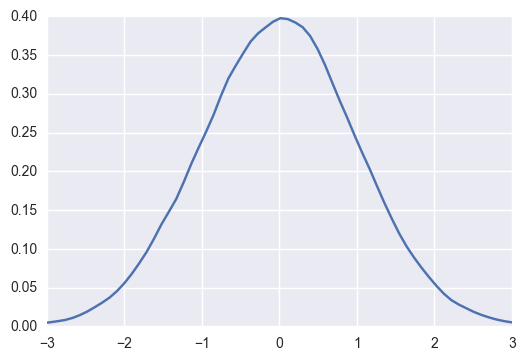

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.kdeplot(np.random.randn(100000))
plt.xlim(-3, 3)
plt.show()

#### diag

指定对角线元素

In [11]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

可以使用参数k来设定偏移量:

In [12]:
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [13]:
np.diag([1,2,3], k=-2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

### 1.2.4 从文件中读取数据

我们使用詹姆斯$\bullet$哈登2009-2010赛季至本赛季的数据来作为例子. 数据我是从官网下载(2016.12.07)并过滤的. 放到同一目录下. 在ipython中也可用shell命令, 命令前要加上!:

In [30]:
!ls

JamesHarden.csv   Numpy笔记.ipynb   README.md         random-matrix.csv


使用head命令查看该文件:

In [31]:
!head JamesHarden.csv









22.9,9.9,40.3,37.5,80.8,3.2,1.8,1.4,1.1,0.3

每列分别代表:上场时间, 得分, 投篮命中率, 三分命中率, 发球命中率, 篮板, 助攻, 失误, 抢断, 盖帽. 现在我们使用numpy中的**genfromtxt**来读取数据:

In [32]:
data = np.genfromtxt("JamesHarden.csv", delimiter=",")

In [33]:
data.shape

(9, 10)

现在我们查看一下数据:

In [34]:
data

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [ 37.1,  28.7,  44.7,  35.3,  84.4,   7.6,  11.6,   5.7,   1.4,
          0.3],
       [ 38.1,  29. ,  43.9,  35.9,  86. ,   6.1,   7.5,   4.6,   1.7,
          0.6],
       [ 36.8,  27.4,  44. ,  37.5,  86.8,   5.7,   7. ,   4. ,   1.9,
          0.7],
       [ 38. ,  25.4,  45.6,  36.6,  86.6,   4.7,   6.1,   3.6,   1.6,
          0.4],
       [ 38.3,  25.9,  43.8,  36.8,  85.1,   4.9,   5.8,   3.8,   1.8,
          0.5],
       [ 31.4,  16.8,  49.1,  39. ,  84.6,   4.1,   3.7,   2.2,   1. ,
          0.2],
       [ 26.7,  12.2,  43.6,  34.9,  84.3,   3.1,   2.1,   1.3,   1.1,
          0.3],
       [ 22.9,   9.9,  40.3,  37.5,  80.8,   3.2,   1.8,   1.4,   1.1,
          0.3]])

我们发现第一行竟然全变成了nan, 之前说了ndarray元素必须是同一数据类型. 这里numpy试图把所有的值都转成浮点型, 但是第一行无法转成浮点型, 就变成了nan是not a number的缩写. 我们查看一下元素类型:

In [35]:
data.dtype

dtype('float64')

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

因为数据自上而下是从这个赛季到09赛季, 所以要把它倒过来.(参考:[Most efficient way to reverse a numpy array](http://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array), [Basic Slicing and Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)).
并且, 画折线图的时候, 横坐标是连续的数值, 需要将其转换成离散的字符串(参考:[plot with custom text for x axis points](http://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points)).  
首先, 画一个得分的数据.

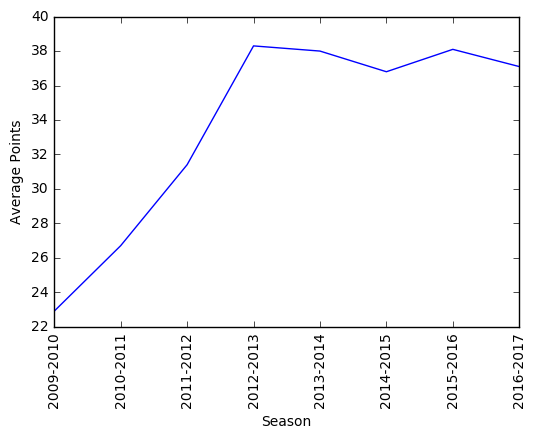

In [37]:
x = [0,1,2,3,4,5,6,7]
date = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017"]
plt.plot(data[1:,0][::-1])
plt.xticks(x, date)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Average Points")

从上图看出, 从新秀赛季开始的四个赛季, 场均得分飙升. 特别是12-13赛季, 场均得分上升最快的一年. 到后面就趋于稳定了. (2012年哈登从雷霆被交易到火箭, 从最佳第六人变成老大.)  
再来看一个助攻的数据.

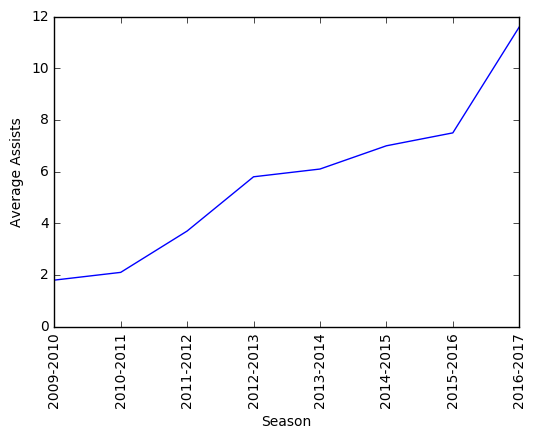

In [38]:
plt.plot(data[1:,6][::-1])
plt.xticks(x, date)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Average Assists")

本赛季哈登最大的变化就是助攻了, 目前(2016.12.07)场均助攻领跑全联盟.

### 1.2.5 将数据保存到文件

numpy可以从文件中读取数据, 也可以把数据保存到文件.

In [39]:
mtrx = random.rand(5,5)
mtrx

array([[ 0.88504556,  0.01479843,  0.94163546,  0.19490114,  0.18961184],
       [ 0.75196073,  0.54246265,  0.90876973,  0.32543033,  0.26626577],
       [ 0.31419061,  0.89571665,  0.81540773,  0.3971738 ,  0.85406242],
       [ 0.67532214,  0.54994375,  0.46401625,  0.96433572,  0.51620145],
       [ 0.78130101,  0.85106652,  0.22856669,  0.74748656,  0.98560095]])

In [40]:
np.savetxt("random-matrix.csv", mtrx, fmt="%.8f")

查看保存的数据:

In [41]:
!ls

JamesHarden.csv   Numpy笔记.ipynb   README.md         random-matrix.csv


In [42]:
!head random-matrix.csv

0.88504556 0.01479843 0.94163546 0.19490114 0.18961184
0.75196073 0.54246265 0.90876973 0.32543033 0.26626577
0.31419061 0.89571665 0.81540773 0.39717380 0.85406242
0.67532214 0.54994375 0.46401625 0.96433572 0.51620145
0.78130101 0.85106652 0.22856669 0.74748656 0.98560095


## 1.3 矩阵操作

### 1.3.1 索引

当操作对象是向量时, 此时的索引和python中的列表没差别:

In [43]:
vec = np.array([1,2,3])
print(vec[1])

2


当操作对象是矩阵时, 可用[a,b]表示a行b列的元素(0行0列开始):

In [44]:
mtrx = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(mtrx)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [45]:
mtrx[1,2]

6

若输入第一个数字, 那么就代表整行的元素组成的向量:

In [46]:
# 第二行所有元素
mtrx[1,]

array([4, 5, 6])

但是不可以只输入第二个数字:

In [47]:
# 报错
mtrx[,1]

SyntaxError: invalid syntax (<ipython-input-47-df6afdcc3bb8>, line 2)

可以使用冒号:

In [48]:
# 第二列所有元素
mtrx[:,1]

array([2, 5, 8])

In [49]:
# 同样地, mtrx[1,]也可以写成mtrx[1,:]:
print(mtrx[1,])
print(mtrx[1,:])

[4 5 6]
[4 5 6]


### 1.3.2 赋值

In [50]:
vec

array([1, 2, 3])

In [51]:
mtrx

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

知道了索引之后, 就可以进行赋值操作了.对于一个向量:

In [52]:
vec[1] = 10
vec

array([ 1, 10,  3])

对于一个矩阵:

In [53]:
mtrx[1,1] = 99
mtrx

array([[ 1,  2,  3],
       [ 4, 99,  6],
       [ 7,  8,  9]])

也可以对整行或整列赋值:

In [54]:
mtrx[1,:] = [6, 5, 4]
mtrx

array([[1, 2, 3],
       [6, 5, 4],
       [7, 8, 9]])

可以将整行或整列赋值为同一值:

In [55]:
mtrx[:,1] = 99
mtrx

array([[ 1, 99,  3],
       [ 6, 99,  4],
       [ 7, 99,  9]])

### 1.3.3 切片

In [56]:
vec = np.array([1,2,3,4,5])

In [57]:
vec

array([1, 2, 3, 4, 5])

In [59]:
vec[1:3]

array([2, 3])

In [60]:
vec[1:3] = [8, 7]
vec

array([1, 8, 7, 4, 5])

In [61]:
vec[0:5]

array([1, 8, 7, 4, 5])

In [62]:
vec[:3]

array([1, 8, 7])

In [63]:
vec[3:]

array([4, 5])

In [64]:
vec[:]

array([1, 8, 7, 4, 5])

In [65]:
vec[0:5:1]

array([1, 8, 7, 4, 5])

In [66]:
vec[::]

array([1, 8, 7, 4, 5])

In [67]:
vec[::2]

array([1, 7, 5])

In [68]:
vec[1:4]

array([8, 7, 4])

In [69]:
vec[-1]

5

In [70]:
vec[-2:]

array([4, 5])

In [71]:
mtrx[::2,1::2]

array([[2, 4],
       [6, 8]])

In [76]:
mtrx = np.array([[1,2,3,4,5], [3,4,5,6,7], [5,6,7,8,9], [6,7,8,9,10]])
mtrx

array([[ 1,  2,  3,  4,  5],
       [ 3,  4,  5,  6,  7],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

In [79]:
mtrx[1:4]

array([[ 3,  4,  5,  6,  7],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

In [81]:
mtrx[:,2:5]

array([[ 3,  4,  5],
       [ 5,  6,  7],
       [ 7,  8,  9],
       [ 8,  9, 10]])

In [82]:
mtrx[1:4,2:5]

array([[ 5,  6,  7],
       [ 7,  8,  9],
       [ 8,  9, 10]])

In [89]:
mtrx[:]

array([[ 1,  2,  3,  4,  5],
       [ 3,  4,  5,  6,  7],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

mtrx[:,:]

In [93]:
mtrx[:2]

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 6, 7]])

In [94]:
mtrx[:,2:]

array([[ 3,  4,  5],
       [ 5,  6,  7],
       [ 7,  8,  9],
       [ 8,  9, 10]])

In [100]:
mtrx[1:3,::2]

array([[3, 5, 7],
       [5, 7, 9]])

In [104]:
mask = (mtrx%2 == 0)
mask

array([[False,  True, False,  True, False],
       [False,  True, False,  True, False],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]], dtype=bool)

In [110]:
mtrx[mask]

array([ 2,  4,  4,  6,  6,  8,  6,  8, 10])

In [111]:
np.where(mask)

(array([0, 0, 1, 1, 2, 2, 3, 3, 3]), array([1, 3, 1, 3, 1, 3, 0, 2, 4]))

AttributeError: module 'numpy' has no attribute 'version_information'